# School inspection reports' analysis

This code, which uses SoS as the background, is written in Python (for the data extraction and manipulation) and R (for the Topic analysis). The respective sections can be extracted and used separetely, or jointly by following the installation guidelines presented in the link below.

https://vatlab.github.io/sos-docs/running.html#Local-installation

The user should run the following lines from the Command Prompt

- pip install sos-notebook
- pip install sos-papermill
- pip install sos-r
- python -m sos_notebook.install
- jupyter kernelspec list

and choose SoS as the kernel for a new notebook. Please refer to Notebook Interface of the SoS documentation for details (https://vatlab.github.io/sos-docs/doc/documentation/Notebook_Interface.html)

Data from Ireland taken from https://data.gov.ie/dataset/primary-schools and https://www.education.ie/en/Publications/Inspection-Reports-Publications/Whole-School-Evaluation-Reports-List


In [1]:
!pip install rpy2
!pip install wget
!pip install pdfminer.six
!pip install geopandas
!pip install geopy
!pip install bs4
!pip install pandas
!pip install lxml

# We import the necessary packages
import sys, os, csv, requests, re, bs4, datetime, time, threading, wget, pdfminer, geopy
import pandas as pd
import matplotlib.pyplot as plt
from pdfminer.high_level import extract_text
from geopy.geocoders import Nominatim
import numpy as np

Select the appropriate working directory

In [2]:
#os.chdir("C:\\Users\g.vargas\BOX\IIEP_MyProjects\MP_01000298\WorkFiles_Inspection\Ireland")  # REMOVE
if os.getcwd()!="C:\\Users\g.vargas\BOX\IIEP_MyProjects\MP_01000298\WorkFiles_Inspection\Ireland":
    print("Please insert the WORKING DIRECTORY")                                                            # We create a loop so that the user establishes the working directory
    print("Remember to separate the backslash (for Windows) or forward slash (in Mac)") 
    while True:                                                                             
        NewPath=input()                                                                                     # The user inserts the working directory
        if os.path.exists(NewPath)==True:                                                                   # If the program exists, the working directory will be updated
            os.chdir(NewPath)                                                               
            print("Your new path is " + os.getcwd())                                        
            break                                                                                           # If the condition is met, the program keeps running
        else:                                                                                               # If the condition is not met, the program requests the user to
            print("Please check if the path is correctly written")                                          # insert a new path and the condition is checked again
        continue
else: 
    print("Your path is " + os.getcwd())

Please insert the WORKING DIRECTORY
Remember to separate the backslash (for Windows) or forward slash (in Mac)
/home/charifi1132/Hackathon/data
Your new path is /home/charifi1132/Hackathon/data


## Extracting the tables from the webpage and turning them into a DataFrame

Note that his DataFrame will not only work to later download the corresponding reports, but it is a useful Metadata database, which can be then used to make analyses on the different results across time, location, or type of school. 

In [3]:
!pip install lxml

In [4]:
WebpageRoot = "https://www.education.ie/en/Publications/Inspection-Reports-Publications/Whole-School-Evaluation-Reports-List/?pageNumber="
General_InspectionReports = pd.DataFrame(columns=['Date','School Roll No.','County','School Name','School Level','Inspection Type','Subject','URL'])

print("How many pages would you like to download?")
NumberPages = input()

for x in range(1,int(NumberPages)):
    IrelandWebpage = requests.get(WebpageRoot + str(x))
    CleanIrelandWebpage = bs4.BeautifulSoup(IrelandWebpage.text, "lxml")
    InspectionReports = {}
    ID = 0
    Table = CleanIrelandWebpage.find('table', id="IRList")
    for p in Table.find_all('tr'):
        if ID == 0:
            ID = ID + 1
            continue
        else:
            Date = p('td')[0].string[:2] + '_' + p('td')[0].string[3:5] + '_' + p('td')[0].string[6:]
            SchoolRoll = p('td')[1].string
            County = p('td')[2].string
            SchoolName = p('td')[3].string
            SchoolLevel = p('td')[4].string
            InspectionType = p('td')[5].string
            Subject = p('td')[6].string
            URL = p('td')[7]('a')[0].attrs['href'][86:]
            InspectionReports[ID] = {'Date': Date, 'School Roll No.': SchoolRoll, 'County': County, 'School Name': SchoolName, 'School Level': SchoolLevel, 'Inspection Type': InspectionType, 'Subject': Subject, 'URL': URL}
            ID = ID + 1

    df_InspectionReports = pd.DataFrame.from_dict(InspectionReports, orient='index')
    General_InspectionReports = pd.concat([General_InspectionReports,df_InspectionReports]) 


How many pages would you like to download?
194


## Downloading the PDFs

In [5]:
PDFToConvert = []
for index, row in General_InspectionReports.iterrows():
    DownloadURL = 'https://www.education.ie/en/Publications/Inspection-Reports-Publications/Whole-School-Evaluation-Reports-List/' + row['URL']
    FileName = 'Reports\\' + row['School Roll No.'] + '_' + row['Date'] + '.pdf'
    PDFToConvert.append('Reports\\' + row['School Roll No.'] + '_' + row['Date'])
    print('Report ' + row['School Roll No.'] + ' downloaded')
    wget.download(DownloadURL, FileName)

Report 70660O downloaded
Report 61811I downloaded
Report 62360G downloaded
Report 64810V downloaded
Report 13299E downloaded
Report 20440Q downloaded
Report 16871V downloaded
Report 17443F downloaded
Report 70760S downloaded
Report 12936D downloaded
Report 07518E downloaded
Report 19458F downloaded
Report 20205G downloaded
Report 60660I downloaded
Report 62930V downloaded
Report 71330V downloaded
Report 14194S downloaded
Report 19209H downloaded
Report 12792F downloaded
Report 81016V downloaded
Report 91614B downloaded
Report 91391H downloaded
Report 72310U downloaded
Report 20008E downloaded
Report 20242M downloaded
Report 62730N downloaded
Report 64220A downloaded
Report 19926M downloaded
Report 64370T downloaded
Report 65190W downloaded
Report 18660S downloaded
Report 70640I downloaded
Report 20313J downloaded
Report 20435A downloaded
Report 17893N downloaded
Report 65100S downloaded
Report 70081V downloaded
Report 60321J downloaded
Report 20220C downloaded
Report 20073P downloaded


Report 91436D downloaded
Report 20181S downloaded
Report 05508O downloaded
Report 20389T downloaded
Report 19455W downloaded
Report 91502N downloaded
Report 91516B downloaded
Report 14180H downloaded
Report 17523D downloaded
Report 18681D downloaded
Report 61220I downloaded
Report 64240G downloaded
Report 65170Q downloaded
Report 81017A downloaded
Report 91372D downloaded
Report 60840K downloaded
Report 71230R downloaded
Report 63900R downloaded
Report 19838P downloaded
Report 18910P downloaded
Report 12954F downloaded
Report 20098I downloaded
Report 61120E downloaded
Report 62960H downloaded
Report 19912B downloaded
Report 60343T downloaded
Report 19282R downloaded
Report 20493O downloaded
Report 72540O downloaded
Report 17738B downloaded
Report 19108B downloaded
Report 81010J downloaded
Report 17003A downloaded
Report 19906G downloaded
Report 65350S downloaded
Report 61010U downloaded
Report 91318U downloaded
Report 70380I downloaded
Report 76102K downloaded
Report 91493P downloaded


Report 19779C downloaded
Report 18298E downloaded
Report 20381D downloaded
Report 76130P downloaded
Report 17217T downloaded
Report 18193N downloaded
Report 14468G downloaded
Report 17129W downloaded
Report 12180U downloaded
Report 18563U downloaded
Report 61320M downloaded
Report 60720A downloaded
Report 14830U downloaded
Report 18125T downloaded
Report 20292E downloaded
Report 70500P downloaded
Report 19151C downloaded
Report 19636D downloaded
Report 76090G downloaded
Report 19841E downloaded
Report 71220O downloaded
Report 71280J downloaded
Report 61940T downloaded
Report 91412M downloaded
Report 15285D downloaded
Report 17602W downloaded
Report 20028K downloaded
Report 18288B downloaded
Report 19470S downloaded
Report 68077S downloaded
Report 17505B downloaded
Report 17710C downloaded
Report 19410A downloaded
Report 60820E downloaded
Report 70610W downloaded
Report 70410O downloaded
Report 18483W downloaded
Report 19294B downloaded
Report 18038B downloaded
Report 17260U downloaded


Report 10863P downloaded
Report 20257C downloaded
Report 15475I downloaded
Report 16562I downloaded
Report 16804G downloaded
Report 61301I downloaded
Report 15937U downloaded
Report 91360T downloaded
Report 20192A downloaded
Report 60370W downloaded
Report 20377M downloaded
Report 17119T downloaded
Report 91343T downloaded
Report 70450D downloaded
Report 61360B downloaded
Report 02237R downloaded
Report 15594Q downloaded
Report 15970S downloaded
Report 14987H downloaded
Report 62690E downloaded
Report 63170G downloaded
Report 18435L downloaded
Report 63730S downloaded
Report 19651W downloaded
Report 16850N downloaded
Report 20327U downloaded
Report 19215C downloaded
Report 91448K downloaded
Report 20165U downloaded
Report 03275H downloaded
Report 16023B downloaded
Report 70040H downloaded
Report 17950W downloaded
Report 16744O downloaded
Report 09837H downloaded
Report 64260M downloaded
Report 19015R downloaded
Report 02322I downloaded
Report 19454U downloaded
Report 18080A downloaded


Report 19255O downloaded
Report 60700R downloaded
Report 12106I downloaded
Report 11605V downloaded
Report 16444C downloaded
Report 17481N downloaded
Report 18863J downloaded
Report 17561I downloaded
Report 14450K downloaded
Report 16566Q downloaded
Report 63750B downloaded
Report 02428B downloaded
Report 04487E downloaded
Report 17526J downloaded
Report 65090S downloaded
Report 10049M downloaded
Report 17050J downloaded
Report 20379Q downloaded
Report 15299O downloaded
Report 04230N downloaded
Report 05565D downloaded
Report report1_19557H downloaded
Report 01866U downloaded
Report 19333I downloaded
Report 01572D downloaded
Report 19849U downloaded
Report 17689O downloaded
Report 11873A downloaded
Report 64201T downloaded
Report 15419V downloaded
Report 17856H downloaded
Report 17720F downloaded
Report 64970U downloaded
Report 15878H downloaded
Report 19356U downloaded
Report 18016O downloaded
Report 13889C downloaded
Report 19707A downloaded
Report 12788O downloaded
Report 10886E dow

Report 18509O downloaded
Report 19524P downloaded
Report 18876S downloaded
Report 14383V downloaded
Report 18872K downloaded
Report 19547E downloaded
Report 19377F downloaded
Report 91301D downloaded
Report 09306W downloaded
Report 14972R downloaded
Report 15160G downloaded
Report 01553W downloaded
Report 11843O downloaded
Report 16671N downloaded
Report 20056P downloaded
Report 16983J downloaded
Report 64710R downloaded
Report 16319W downloaded
Report 63760E downloaded
Report 19421F downloaded
Report 20355C downloaded
Report 06100K downloaded
Report 17341U downloaded
Report 18063A downloaded
Report 76062B downloaded
Report 72480W downloaded
Report 18694M downloaded
Report 12767G downloaded
Report 18696Q downloaded
Report 17681V downloaded
Report 17585C downloaded
Report 17195M downloaded
Report 60471F downloaded
Report 11525A downloaded
Report 05627W downloaded
Report 16340N downloaded
Report 17268N downloaded
Report 61920N downloaded
Report 17703F downloaded
Report 13198V downloaded


Report 63050T downloaded
Report 64620Q downloaded
Report 13757I downloaded
Report 14049J downloaded
Report 19283T downloaded
Report 18581W downloaded
Report 19996K downloaded
Report 70730J downloaded
Report 19261J downloaded
Report 19785U downloaded
Report 18430B downloaded
Report 18331W downloaded
Report 60081P downloaded
Report 16485Q downloaded
Report 18510W downloaded
Report 19321B downloaded
Report 60731F downloaded
Report 15226K downloaded
Report 01170G downloaded
Report 16573N downloaded
Report 76067L downloaded
Report 62560O downloaded
Report 00538V downloaded
Report 19745I downloaded
Report 18325E downloaded
Report 71770D downloaded
Report 19596R downloaded
Report 17354G downloaded
Report 62861F downloaded
Report 18329M downloaded
Report 17716O downloaded
Report 16767D downloaded
Report 62360G downloaded
Report 62421A downloaded
Report 72400V downloaded
Report 20133H downloaded
Report 18236F downloaded
Report 19351K downloaded
Report 17103E downloaded
Report 71710I downloaded


Report 19404F downloaded
Report 19881Q downloaded
Report 19978I downloaded
Report 91387Q downloaded
Report 16722E downloaded
Report 10751E downloaded
Report 91501L downloaded
Report 11361T downloaded
Report 18558E downloaded
Report 19508R downloaded
Report 12529N downloaded
Report 16634H downloaded
Report 18010C downloaded
Report 15046I downloaded
Report 19955T downloaded
Report 64810V downloaded
Report 18818E downloaded
Report 17608L downloaded
Report 65440T downloaded
Report 14356S downloaded
Report 13661S downloaded
Report 17297U downloaded
Report 18339P downloaded
Report 18339P downloaded
Report 61910K downloaded
Report 61910K downloaded
Report 61910K downloaded
Report 61910K downloaded
Report 61910K downloaded
Report 15968I downloaded
Report 17326B downloaded
Report 62540I downloaded
Report 62640M downloaded
Report 18731P downloaded
Report 17549V downloaded
Report 19898K downloaded
Report 16567S downloaded
Report 18671A downloaded
Report 19114T downloaded
Report 19569O downloaded


Report 65470F downloaded
Report 20045K downloaded
Report 70760S downloaded
Report 63270K downloaded
Report 17236A downloaded
Report 16833N downloaded
Report 18315B downloaded
Report 19890R downloaded
Report 13335F downloaded
Report 17267L downloaded
Report 17510R downloaded
Report 05513H downloaded
Report 63210P downloaded
Report 12413R downloaded
Report 17091A downloaded
Report 18365Q downloaded
Report 81016V downloaded
Report 65280A downloaded
Report 17525H downloaded
Report 15279I downloaded
Report 18183K downloaded
Report 12004A downloaded
Report 13234W downloaded
Report 91397T downloaded
Report 10494K downloaded
Report 18170B downloaded
Report 19556F downloaded
Report 91315O downloaded
Report 60841M downloaded
Report 14502D downloaded
Report 19376D downloaded
Report 01328P downloaded
Report 17154V downloaded
Report 18572V downloaded
Report 15632V downloaded
Report 17253A downloaded
Report 18064C downloaded
Report 13343E downloaded
Report 14260F downloaded
Report 20311F downloaded


Report 17513A downloaded
Report 19162H downloaded
Report 19936P downloaded
Report 15628H downloaded
Report 18326G downloaded
Report 19645E downloaded
Report 20220C downloaded
Report 15895H downloaded
Report 62830R downloaded
Report 17898A downloaded
Report 17953F downloaded
Report 60030V downloaded
Report 60310E downloaded
Report 62890M downloaded
Report 20175A downloaded
Report 08673V downloaded
Report 17132L downloaded
Report 12488C downloaded
Report 18169Q downloaded
Report 18358T downloaded
Report 19948W downloaded
Report 05070W downloaded
Report 15177A downloaded
Report 11978O downloaded
Report 13940W downloaded
Report 61560J downloaded
Report 19613O downloaded
Report 68077S downloaded
Report 61141M downloaded
Report 18154D downloaded
Report 20105C downloaded
Report 17055T downloaded
Report 17954H downloaded
Report 70130I downloaded
Report 17820J downloaded
Report 18788V downloaded
Report 19499T downloaded
Report 20131D downloaded
Report 60550B downloaded
Report 18151U downloaded


Report 18432F downloaded
Report 15337T downloaded
Report 16549Q downloaded
Report 17638U downloaded
Report 91376L downloaded
Report 76092K downloaded
Report 15569R downloaded
Report 91305L downloaded
Report 60264A downloaded
Report 91325R downloaded
Report 19252I downloaded
Report 19756N downloaded
Report 71140Q downloaded
Report 70920O downloaded
Report 17479D downloaded
Report 70380I downloaded
Report 19559L downloaded
Report 62000W downloaded
Report 04118T downloaded
Report 17755B downloaded
Report 19426P downloaded
Report 11373D downloaded
Report 13951E downloaded
Report 19994G downloaded
Report 16091S downloaded
Report 62981P downloaded
Report 63001G downloaded
Report 20147S downloaded
Report 91504R downloaded
Report 15957D downloaded
Report 00570R downloaded
Report 17737W downloaded
Report 64240G downloaded
Report 18780F downloaded
Report 11725I downloaded
Report 13667H downloaded
Report 17482P downloaded
Report 64510J downloaded
Report 18408I downloaded
Report 15883A downloaded


Report 61860V downloaded
Report 17612C downloaded
Report 18714P downloaded
Report 12540B downloaded
Report 17783G downloaded
Report 15395K downloaded
Report 14534Q downloaded
Report 18772G downloaded
Report 19210P downloaded
Report 61590S downloaded
Report 17931S downloaded
Report 19777V downloaded
Report 19939V downloaded
Report 91498C downloaded
Report 71270G downloaded
Report 19708C downloaded
Report 16885J downloaded
Report 60420L downloaded
Report 65300D downloaded
Report 76063D downloaded
Report 04210H downloaded
Report 05630L downloaded
Report 16774A downloaded
Report 18344I downloaded
Report 19736H downloaded
Report 18405C downloaded
Report 17812K downloaded
Report 91431Q downloaded
Report 15315J downloaded
Report 19209H downloaded
Report 19601H downloaded
Report 19793T downloaded
Report 19946S downloaded
Report 19962Q downloaded
Report 20010O downloaded
Report 18519R downloaded
Report 70010V downloaded
Report 91342R downloaded
Report 17018N downloaded
Report 19310T downloaded


## Converting the PDFs to text and cleaning them from unusefull content

In [8]:
ConvertionCategories = {"Properly processed":0, "Not in text format":0, "Cannot be processed":0}
FilesProperlyConverted = {}
FilesNotConverted = []
def find_2nd(string, substring):
    return string.find(substring, string.find(substring) + 1)
for PDF in PDFToConvert:
    try: 
        Text = extract_text(PDF + '.pdf')
        if len(Text)==0:
            ConvertionCategories["Not in text format"] = ConvertionCategories["Not in text format"] + 1
            print(PDF + ' is not in text format')
        else:
            ConvertionCategories["Properly processed"] = ConvertionCategories["Properly processed"] + 1
            Option1 = Text.find('WHOLE-SCHOOL EVALUATION – MANAGEMENT, LEADERSHIP AND LEARNING   Dates of inspection')
            if Option1 != -1:
                Text = Text[Option1:]
            Option2 = Text.find('WHOLE-SCHOOL EVALUATION – MANAGEMENT, LEADERSHIP AND LEARNING    Date of inspection')
            if Option2 != -1:
                Text = Text[Option2:]
            Option3 = Text.find('WHOLE-SCHOOL EVALUATION – MANAGEMENT, LEADERSHIP AND LEARNING  Dates of inspection')
            if Option3 != -1:
                Text = Text[Option3:]
            Option4 = Text.find('WHOLE-SCHOOL EVALUATION – MANAGEMENT, LEADERSHIP AND LEARNING Dates of inspection')
            if Option4 != -1:
                Text = Text[Option4:]
            Option5 = Text.find('Whole-School Evaluation – Management, Leadership and Learning Dates of inspection')
            if Option5 != -1:
                Text = Text[Option5:]
            Option6 = Text.find('Whole-School Evaluation Date of inspection')
            if Option6 != -1:
                Text = Text[Option6:]
            if Text.find('An Roinn') == 1:
                Text = Text[find_2nd(Text, 'Dates of inspection'):]
            Option7 = Text.find('THE INSPECTORATE’S QUALITY CONTINUUM')
            if Option7 != -1:
                Text = Text[:Option7 - 1]
            Option8 = Text.find('MEASTÓIREACHT SCOILE UILE – BAINISTÍOCHT, CEANNAIREACHT AGUS FOGHLAIM')
            if Option8 != -1:
                FilesNotConverted.append(PDF[8:])
                print('Report ' + PDF[8:] + ' could not be processed')
                continue
            FilesProperlyConverted[PDF] = {'Text': Text}
            with open("Reports\\Plain text\\" + PDF[8:] + ".txt", "w", errors="ignore") as output:
                output.write(str(Text))
            print('Report ' + PDF[8:] + ' properly processed')
    except (KeyError, UnicodeEncodeError):
        ConvertionCategories["Cannot be processed"] = ConvertionCategories["Cannot be processed"] + 1
        FilesNotConverted.append(PDF[8:])
        print('Report ' + PDF[8:] + ' could not be processed')
        continue

df_FilesProperlyConverted = pd.DataFrame.from_dict(FilesProperlyConverted, orient='index')

plt.bar(*zip(*ConvertionCategories.items()))
#plt.show()

General_InspectionReports['Key'] = General_InspectionReports['School Roll No.'] + '_' + General_InspectionReports['Date']
General_InspectionReports.to_csv(r'Reports\\InspectionReports.csv', index=False)
for p in range(len(FilesNotConverted)):
    General_InspectionReports.drop(General_InspectionReports[General_InspectionReports.Key == FilesNotConverted[p]].index, inplace=True)
General_InspectionReports.to_csv(r'Reports\\InspectionReports2.csv', index=False)

Report 70660O_27_01_2021 properly processed
Report 61811I_26_01_2021 properly processed
Report 62360G_15_01_2021 properly processed
Report 64810V_14_01_2021 properly processed
Report 13299E_13_01_2021 properly processed
Report 20440Q_13_01_2021 properly processed
Report 16871V_18_12_2020 properly processed
Report 17443F_18_12_2020 properly processed
Report 70760S_18_12_2020 properly processed
Report 12936D_17_12_2020 properly processed
Report 07518E_15_12_2020 properly processed
Report 19458F_15_12_2020 properly processed
Report 20205G_15_12_2020 properly processed
Report 60660I_10_12_2020 properly processed
Report 62930V_10_12_2020 properly processed
Report 71330V_07_12_2020 properly processed
Report 14194S_04_12_2020 properly processed
Report 19209H_04_12_2020 properly processed
Report 12792F_03_12_2020 properly processed
Report 81016V_03_12_2020 properly processed
Report 91614B_02_12_2020 properly processed
Report 91391H_18_11_2020 properly processed
Report 72310U_13_11_2020 properl

Report 19456B_17_05_2019 properly processed
Report 20443W_17_05_2019 properly processed
Report 01421F_16_05_2019 properly processed
Report 05970M_15_05_2019 properly processed
Report 14052V_15_05_2019 properly processed
Report 12447L_14_05_2019 properly processed
Report 20382F_14_05_2019 properly processed
Report 15259C_10_05_2019 properly processed
Report 19359D_10_05_2019 properly processed
Report 65470F_10_05_2019 properly processed
Report 15395K_03_05_2019 properly processed
Report 16681Q_03_05_2019 properly processed
Report 20155R_03_05_2019 properly processed
Report 60310E_03_05_2019 properly processed
Report 60042F_01_05_2019 properly processed
Report 07315N_01_05_2019 properly processed
Report 16893I_01_05_2019 properly processed
Report 18820O_30_04_2019 properly processed
Report 19734D_30_04_2019 properly processed
Report 91456J_30_04_2019 properly processed
Report 70260V_15_04_2019 properly processed
Report 60130C_15_04_2019 properly processed
Report 05630L_12_04_2019 properl

Report 91397T_05_06_2018 properly processed
Report 02278I_31_05_2018 properly processed
Report 06176U_31_05_2018 properly processed
Report 19724A_31_05_2018 properly processed
Report 71990R_31_05_2018 properly processed
Report 91510M_31_05_2018 properly processed
Report 64510J_29_05_2018 properly processed
Report 64971W_29_05_2018 properly processed
Report 76098W_29_05_2018 properly processed
Report 19852J_24_05_2018 properly processed
Report 20140E_23_05_2018 properly processed
Report 64590K_23_05_2018 properly processed
Report 20279M_22_05_2018 properly processed
Report 60070K_22_05_2018 properly processed
Report 62870G_22_05_2018 properly processed
Report 19331E_17_05_2018 properly processed
Report 70121H_16_05_2018 properly processed
Report 16027J_15_05_2018 properly processed
Report 19496N_15_05_2018 properly processed
Report 16267G_11_05_2018 properly processed
Report 19857T_10_05_2018 properly processed
Report 20413N_10_05_2018 properly processed
Report 20332N_08_05_2018 properl

Report 19765O_21_09_2017 properly processed
Report 19503H_20_09_2017 properly processed
Report 20351R_20_09_2017 properly processed
Report 13663W_20_09_2017 properly processed
Report 71123Q_19_09_2017 properly processed
Report 16136O_14_09_2017 properly processed
Report 19325J_14_09_2017 properly processed
Report 16461C_13_09_2017 properly processed
Report 61930Q_13_09_2017 properly processed
Report 62180E_13_09_2017 properly processed
Report 76073G_13_09_2017 properly processed
Report 81002K_13_09_2017 properly processed
Report 19872P_12_09_2017 properly processed
Report 65080P_08_09_2017 properly processed
Report 11583O_06_09_2017 properly processed
Report 18766L_26_06_2017 properly processed
Report 10014Q_23_06_2017 properly processed
Report 06658P_22_06_2017 properly processed
Report 14925I_22_06_2017 properly processed
Report 15523Q_22_06_2017 properly processed
Report 16435B_22_06_2017 properly processed
Report 17957N_22_06_2017 properly processed
Report 19305D_22_06_2017 properl

Report 62470N_17_11_2016 properly processed
Report 19285A_16_11_2016 properly processed
Report 61860V_28_10_2016 properly processed
Report 71300M_28_10_2016 properly processed
Report 76150V_28_10_2016 properly processed
Report 18779U_26_10_2016 properly processed
Report 91503P_25_10_2016 properly processed
Report 15769C_21_10_2016 properly processed
Report 20394M_19_10_2016 properly processed
Report 19676P_19_10_2016 properly processed
Report 18411U_19_10_2016 properly processed
Report 18484B_19_10_2016 properly processed
Report 15154L_19_10_2016 properly processed
Report 72450N_18_10_2016 properly processed
Report 62980N_14_10_2016 properly processed
Report 60843Q_14_10_2016 properly processed
Report 60342R_13_10_2016 properly processed
Report 91426A_12_10_2016 properly processed
Report 65241N_11_10_2016 properly processed
Report 18514H_07_10_2016 properly processed
Report 70740M_06_10_2016 properly processed
Report 20275E_06_10_2016 properly processed
Report 71150T_03_10_2016 properl

Report 00856M_03_03_2016 properly processed
Report 91498C_29_02_2016 properly processed
Report 20194E_29_02_2016 properly processed
Report 19770H_29_02_2016 properly processed
Report 16281A_25_02_2016 properly processed
Report 18267Q_25_02_2016 properly processed
Report 20307O_25_02_2016 properly processed
Report 20353V_25_02_2016 properly processed
Report 20267F_25_02_2016 properly processed
Report 68080H_23_02_2016 properly processed
Report 19281P_23_02_2016 properly processed
Report 19500B_23_02_2016 properly processed
Report 14252G_23_02_2016 properly processed
Report 19425N_22_02_2016 properly processed
Report 19452Q_22_02_2016 properly processed
Report 20238V_22_02_2016 properly processed
Report 18666H_22_02_2016 properly processed
Report 18635T_16_02_2016 properly processed
Report 19598V_16_02_2016 properly processed
Report 19693P_16_02_2016 properly processed
Report 20347D_15_02_2016 properly processed
Report 19276W_11_02_2016 properly processed
Report 16827S_09_02_2016 properl

Report 19497P_24_06_2015 properly processed
Report 20187H_24_06_2015 properly processed
Report 19605P_24_06_2015 properly processed
Report 16825O_23_06_2015 properly processed
Report 17194K_23_06_2015 properly processed
Report 16732H_23_06_2015 properly processed
Report 17535K_23_06_2015 properly processed
Report 20378O_22_06_2015 properly processed
Report 18585H_22_06_2015 properly processed
Report 15301V_19_06_2015 properly processed
Report 72370P_19_06_2015 properly processed
Report 70901K_19_06_2015 properly processed
Report 68074M_19_06_2015 properly processed
Report 03607G_19_06_2015 properly processed
Report 19973V_19_06_2015 properly processed
Report 62140P_19_06_2015 properly processed
Report 76127D_18_06_2015 properly processed
Report 61830M_18_06_2015 properly processed
Report 19685Q_18_06_2015 properly processed
Report 20277I_18_06_2015 properly processed
Report 20067U_18_06_2015 properly processed
Report 17686I_18_06_2015 properly processed
Report 91497A_18_06_2015 properl

Report 20059V_19_12_2014 properly processed
Report 15554E_19_12_2014 properly processed
Report 17881G_19_12_2014 properly processed
Report 19255O_19_12_2014 properly processed
Report 60700R_19_12_2014 properly processed
Report 12106I_18_12_2014 properly processed
Report 11605V_12_12_2014 properly processed
Report 16444C_12_12_2014 properly processed
Report 17481N_12_12_2014 properly processed
Report 18863J_12_12_2014 properly processed
Report 17561I_12_12_2014 properly processed
Report 14450K_12_12_2014 properly processed
Report 16566Q_12_12_2014 properly processed
Report 63750B_12_12_2014 properly processed
Report 02428B_11_12_2014 properly processed
Report 04487E_11_12_2014 properly processed
Report 17526J_09_12_2014 properly processed
Report 65090S_08_12_2014 properly processed
Report 10049M_04_12_2014 properly processed
Report 17050J_04_12_2014 properly processed
Report 20379Q_04_12_2014 properly processed
Report 15299O_04_12_2014 properly processed
Report 04230N_04_12_2014 properl

Report 14207B_12_06_2014 properly processed
Report 16898S_11_06_2014 properly processed
Report 18733T_11_06_2014 properly processed
Report 18165I_11_06_2014 properly processed
Report 12140I_10_06_2014 properly processed
Report 18424G_10_06_2014 properly processed
Report 18257N_10_06_2014 properly processed
Report 20039P_10_06_2014 properly processed
Report 18682F_10_06_2014 properly processed
Report 16635J_10_06_2014 properly processed
Report 18047C_10_06_2014 properly processed
Report 15291V_10_06_2014 properly processed
Report 19520H_10_06_2014 properly processed
Report 16335U_06_06_2014 properly processed
Report 15597W_06_06_2014 properly processed
Report 11992I_06_06_2014 properly processed
Report 63000E_05_06_2014 properly processed
Report 72360M_05_06_2014 properly processed
Report 15007V_05_06_2014 properly processed
Report 18742U_04_06_2014 properly processed
Report 60240J_03_06_2014 properly processed
Report 13196R_30_05_2014 properly processed
Report 72520I_30_05_2014 properl

Report 70240P_13_12_2013 properly processed
Report 62060R_12_12_2013 properly processed
Report 19208F_12_12_2013 properly processed
Report 10282S_11_12_2013 properly processed
Report 19967D_10_12_2013 properly processed
Report 20219R_10_12_2013 properly processed
Report 13870E_09_12_2013 properly processed
Report 18468D_06_12_2013 properly processed
Report 70180A_06_12_2013 properly processed
Report 76065H_03_12_2013 properly processed
Report 63040Q_02_12_2013 properly processed
Report 02745N_02_12_2013 properly processed
Report 15354T_02_12_2013 properly processed
Report 18318H_02_12_2013 properly processed
Report 64180O_25_11_2013 properly processed
Report 91495T_19_11_2013 properly processed
Report 18130M_18_11_2013 properly processed
Report 19246N_15_11_2013 properly processed
Report 60480G_15_11_2013 properly processed
Report 16352U_15_11_2013 properly processed
Report 17073V_15_11_2013 properly processed
Report 18904U_15_11_2013 properly processed
Report 60630W_14_11_2013 properl

Report 17368R_26_02_2013 properly processed
Report 64220A_22_02_2013 properly processed
Report 17273G_22_02_2013 properly processed
Report 17772B_22_02_2013 properly processed
Report 60320H_21_02_2013 properly processed
Report 18586J_21_02_2013 properly processed
Report 18508M_20_02_2013 properly processed
Report 04809A_20_02_2013 properly processed
Report 64880T_20_02_2013 properly processed
Report 61661P_14_02_2013 properly processed
Report 70021D_14_02_2013 properly processed
Report 19911W_14_02_2013 properly processed
Report 10967E_07_02_2013 properly processed
Report 18168O_07_02_2013 properly processed
Report 17207Q_07_02_2013 properly processed
Report 16984L_07_02_2013 properly processed
Report 13942D_07_02_2013 properly processed
Report 16832L_07_02_2013 properly processed
Report 18559G_07_02_2013 properly processed
Report 18660S_07_02_2013 properly processed
Report 63280N_07_02_2013 properly processed
Report 65610S_07_02_2013 properly processed
Report 17005E_07_02_2013 properl

Report 18328K_02_10_2012 properly processed
Report 17662R_02_10_2012 properly processed
Report 17899C_02_10_2012 properly processed
Report 13203L_01_10_2012 properly processed
Report 70880F_01_10_2012 properly processed
Report 04067F_01_10_2012 properly processed
Report 18580U_28_09_2012 properly processed
Report 15571E_28_09_2012 properly processed
Report 63860I_27_09_2012 properly processed
Report 70360C_27_09_2012 properly processed
Report 60871V_27_09_2012 properly processed
Report 15816I_26_09_2012 properly processed
Report 17601U_26_09_2012 properly processed
Report 18045V_26_09_2012 properly processed
Report 60770P_25_09_2012 properly processed
Report 70430U_25_09_2012 properly processed
Report 60180R_25_09_2012 properly processed
Report 60560E_25_09_2012 properly processed
Report 17643N_25_09_2012 properly processed
Report 19654F_25_09_2012 properly processed
Report 03132I_24_09_2012 properly processed
Report 19415K_24_09_2012 properly processed
Report 76060U_21_09_2012 properl

Report 16100Q_27_03_2012 properly processed
Report 17986U_27_03_2012 properly processed
Report 14348T_27_03_2012 properly processed
Report 15329U_27_03_2012 properly processed
Report 16818R_27_03_2012 properly processed
Report 64900W_27_03_2012 properly processed
Report 17841R_27_03_2012 properly processed
Report 70810H_27_03_2012 properly processed
Report 13299E_01_03_2012 properly processed
Report 17290G_01_03_2012 properly processed
Report 17540D_01_03_2012 properly processed
Report 15638K_01_03_2012 properly processed
Report 17753U_01_03_2012 properly processed
Report 17857J_01_03_2012 properly processed
Report 12792F_01_03_2012 properly processed
Report 15030Q_01_03_2012 properly processed
Report 15113U_01_03_2012 properly processed
Report 17100V_01_03_2012 properly processed
Report 11384I_01_03_2012 properly processed
Report 65340P_01_03_2012 properly processed
Report 61150N_01_03_2012 properly processed
Report 19322D_01_03_2012 properly processed
Report 76084L_01_03_2012 properl

Report 14187V_24_11_2011 properly processed
Report 17590S_24_11_2011 properly processed
Report 70590T_24_11_2011 properly processed
Report 18641O_24_11_2011 properly processed
Report 12692B_27_10_2011 properly processed
Report 06516S_27_10_2011 properly processed
Report 18030I_27_10_2011 properly processed
Report 64250J_27_10_2011 properly processed
Report 14497N_27_10_2011 properly processed
Report 17176I_27_10_2011 properly processed
Report 17209U_27_10_2011 properly processed
Report 16208N_27_10_2011 properly processed
Report 70720G_27_10_2011 properly processed
Report 15870O_27_10_2011 properly processed
Report 17280D_27_10_2011 properly processed
Report 17793J_27_10_2011 properly processed
Report 12014D_27_10_2011 properly processed
Report 14980Q_27_10_2011 properly processed
Report 16659A_27_10_2011 properly processed
Report 16754R_27_10_2011 properly processed
Report 19308J_27_10_2011 properly processed
Report 60710U_27_10_2011 properly processed
Report 14732U_27_10_2011 properl

Report 19950J_09_06_2011 properly processed
Report 15350L_09_06_2011 properly processed
Report YR0007_09_06_2011 properly processed
Report 17637S_09_06_2011 properly processed
Report 12343W_09_06_2011 properly processed
Report 18157J_09_06_2011 properly processed
Report 65470F_09_06_2011 properly processed
Report 20045K_09_06_2011 properly processed
Report 70760S_09_06_2011 properly processed
Report 63270K_09_06_2011 properly processed
Report 17236A_09_06_2011 properly processed
Report 16833N_09_06_2011 properly processed
Report 18315B_09_06_2011 properly processed
Report 19890R_09_06_2011 properly processed
Report 13335F_17_05_2011 properly processed
Report 17267L_17_05_2011 properly processed
Report 17510R_17_05_2011 properly processed
Report 05513H_17_05_2011 properly processed
Report 63210P_17_05_2011 properly processed
Report 12413R_17_05_2011 properly processed
Report 17091A_17_05_2011 properly processed
Report 18365Q_17_05_2011 properly processed
Report 81016V_17_05_2011 properl

PDFSyntaxError: No /Root object! - Is this really a PDF?

### Most used words


In [7]:
!pip install nltk
import matplotlib.pyplot as plt
import nltk, re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = set(nltk.corpus.stopwords.words('english'))

TotalText = []
for index, row in df_FilesProperlyConverted.iterrows():
    text = row['Text']
    TotalText.append(text)

newStopWords = ['school','learning','student','pupil','teacher','management','teaching','support', 'lesson', 'board']
stopwords = stopwords.union(newStopWords)
TotalText = " ".join(TotalText)
tokens = [w for w in word_tokenize(TotalText.lower()) if w.isalpha()]          # isalpha() checks if each word is alphabetical, lower() transforms everything to lowercase
no_stop = [t.strip() for t in tokens if t.strip() not in stopwords]      # stopwords already comes with a built-in list of words to remove
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stop]
bow = Counter(lemmatized)
MostCommon = dict(bow.most_common(10))

plt.bar(*zip(*MostCommon.items()))
plt.title('Whole sample')
plt.xlabel('Most common words')
plt.ylabel('Number of times the word appears')
plt.xticks(rotation='vertical')
plt.savefig("Results\\Word count\\Whole sample.png")
plt.show()


     |████████████████████████████████| 1.4 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 31.2 MB/s eta 0:00:01
     |████████████████████████████████| 732 kB 28.9 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 1.6 MB/s  eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434680 sha256=ac09c82e0817c820b90053fcc61b4f2947d3448379e878c96cd093d6b96bcf43
  Stored in directory: /home/charifi1132/.cache/pip/wheels/13/ae/bb/5e2a232ebaa1d2f38dd5f587e9fc4cf6ccb12758d14dac14d8
Successfully built nltk


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/charifi1132/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/charifi1132/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/charifi1132/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'df_FilesProperlyConverted' is not defined

## Topic modelling

In [16]:
# load the ggplot2 library
library(ggplot2)

NameError: name 'library' is not defined

In [15]:
install.packages("readtext")
install.packages("stm")
install.packages("tm")
install.packages("SnowballC")
install.packages("igraph")

library(readtext)
library(stm)
library(tm)

NameError: name 'library' is not defined

In [21]:
setwd("C:\\Users\\g.vargas\\BOX\\IIEP_MyProjects\\MP_01000298\\WorkFiles_Inspection\\Ireland")
DATA_DIR <- system.file("extdata/", package = "readtext")
ourdata<-readtext("Reports\\Plain text\\*")
# Import additional metadata (year, language, etc.)
metadata <-read.csv("Reports\\InspectionReports.csv")

In [39]:
# Stemming and tokenization
NewStopWords <- c('school','learning','student','pupil', 'pupils','teacher','management','teaching','support', 'lesson', 'board')
processed_data <- textProcessor(ourdata$text,  customstopwords=NewStopWords)

# Prepare Documents For Analysis With Stm
prepared_data <- prepDocuments(processed_data$documents, processed_data$vocab, processed_data$meta)
# Once the prepared_data is ready, open it, see where the metadata is located, and add the information from the ourmetadata

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 
Removing 1399 of 3505 terms (1399 of 30449 tokens) due to frequency 
Your corpus now has 59 documents, 2106 terms and 29050 tokens.

In [25]:
# STM MODELING
# The number of topics can be automatically determined using searchK (see https://cbail.github.io/SICSS_Topic_Modeling.html)
# max.em.its is how many times the model should run
poliblogPrevFit <- stm(prepared_data$documents, prepared_data$vocab, K=3, max.em.its=30, 
                       data=prepared_data$meta, init.type="Spectral")

Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	...
	 Recovering initialization...
 	....................
Initialization complete.
...........................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -6.236) 
...........................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -6.201, relative change = 5.617e-03) 
...........................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound = -6.198, relative change = 4.295e-04) 
...........................................................
Completed E-Step (0 seconds). 
Completed M-Step. 
Completing Iteration 4 (approx. per word bound = -6.198, relative change = 5.402e-05) 
...........................................................
Co

In [27]:
png(filename="Results\\Topic modelling\\Two topics word comparison.png", 
    type="cairo",
    units="in", 
    width=10, 
    height=8, 
    pointsize=12, 
    res=300)
plot(poliblogPrevFit, type="perspectives", topics=c(1,2))
dev.off()

png 
  2

In [28]:
png(filename="Results\\Topic modelling\\Topic prevalence.png", 
    type="cairo",
    units="in", 
    width=10, 
    height=8, 
    pointsize=12, 
    res=300)
plot(poliblogPrevFit, type="summary", xlim=c(0,.8))
dev.off()

png 
  2

In [29]:
png(filename="Results\\Topic modelling\\Words from selected topics.png", 
    type="cairo",
    units="in", 
    width=10, 
    height=8, 
    pointsize=12, 
    res=300)
plot(poliblogPrevFit, type="labels", topics=c(1,2,3))
dev.off()

png 
  2

In [30]:
png(filename="Results\\Topic modelling\\Distribution Document Topic Proportions.png", 
    type="cairo",
    units="in", 
    width=10, 
    height=8, 
    pointsize=12, 
    res=300)
plot(poliblogPrevFit, type="hist")
dev.off()

png 
  2

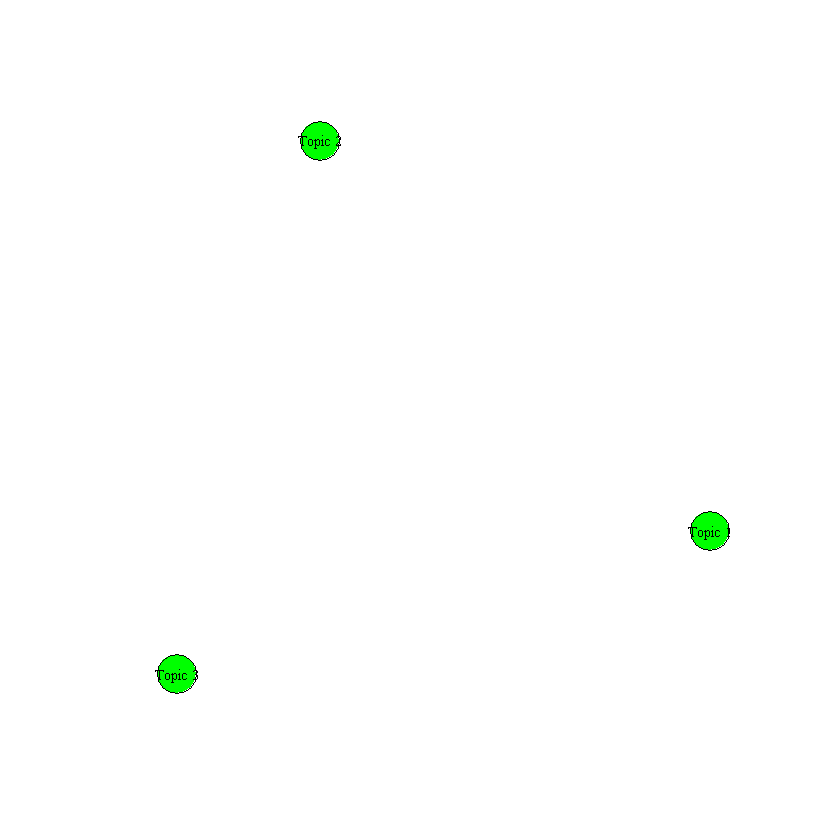

In [31]:
topic_correlation <- topicCorr(poliblogPrevFit, method = c("simple", "huge"), cutoff = 0.01,
                               verbose = TRUE)

plot(topic_correlation, topics = NULL, vlabels = NULL, layout = NULL,
     vertex.color = "green", vertex.label.cex = 0.75,
     vertex.label.color = "black")